<a href="https://colab.research.google.com/github/Bayaniblues/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv
!head LoanStats_2018Q4.csv

--2020-05-05 23:52:00--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.89.161.10, 54.68.72.83, 34.211.18.146
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.89.161.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [   <=>              ]  22.05M  3.00MB/s    in 7.6s    

2020-05-05 23:52:08 (2.91 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","

In [0]:
import pandas as pd

df = pd.read_csv('LoanStats_2018Q4.csv', header=1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0.0,Mar-1991,1.0,NaN,43.0,11.0,1.0,10582.0,58.5%,32.0,w,0.00,0.00,10661.057727,10661.06,...,80.0,1.0,0.0,25600.0,15470.0,15000.0,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500.0,6500.0,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0.0,Aug-2011,1.0,61.0,NaN,24.0,0.0,6741.0,41.6%,30.0,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0.0,0.0,50845.0,40223.0,13300.0,34645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500.0,4500.0,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0.0,Dec-2003,0.0,25.0,NaN,12.0,0.0,4472.0,15.3%,25.0,w,0.00,0.00,4549.217149,4549.22,...,0.0,0.0,0.0,53795.0,29137.0,15100.0,24595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000.0,25000.0,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1.0,Jan-1997,0.0,7.0,NaN,23.0,0.0,39053.0,45.7%,49.0,w,0.00,0.00,5848.050000,5848.05,...,10.0,0.0,0.0,179321.0,95648.0,62800.0,91424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000.0,30000.0,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0.0,Dec-1997,1.0,NaN,NaN,10.0,0.0,1258.0,10.7%,16.0,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0.0,0.0,46300.0,27364.0,10100.0,34500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


## term str to int

In [0]:
df['term'] = df['term'].str.strip(' months')
df['term'] = df['term'].fillna(0)
df['term'] = df['term'].astype(int)
df['term']


0         60
1         36
2         36
3         60
4         60
          ..
128409    36
128410    36
128411    36
128412     0
128413     0
Name: term, Length: 128414, dtype: int64

## Loan_status_is Great

In [0]:
mycol = df['loan_status']
#loan_status_is_great
new_col = []

for x in df['loan_status']:
  if x == "Current":
    new_col.append(1)
  elif x == "Fully Paid":
    new_col.append(1)
  else:
    new_col.append(0)
    
df["loan_status_is_great"] = new_col

In [0]:
df["loan_status_is_great"]

0         1
1         1
2         1
3         0
4         1
         ..
128409    1
128410    1
128411    1
128412    0
128413    0
Name: loan_status_is_great, Length: 128414, dtype: int64

## Split last_pymnt_d month and year

In [0]:
df["last_pymnt_d"].value_counts()

2020-04-01    73153
2020-03-01    10734
2020-05-01     7488
2019-07-01     3146
2019-09-01     2755
2019-12-01     2730
2019-10-01     2722
2019-08-01     2716
2019-05-01     2547
2019-11-01     2388
2019-04-01     2356
2020-01-01     2336
2019-06-01     2288
2019-03-01     1984
2019-02-01     1915
2020-02-01     1858
2020-06-01     1609
2019-01-01     1561
2018-12-01     1054
2018-11-01      679
2018-10-01      234
Name: last_pymnt_d, dtype: int64

In [0]:
df['last_pymnt_d_year'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)

In [0]:
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_year']

0         2019.0
1         2020.0
2         2019.0
3         2019.0
4         2020.0
           ...  
128409    2020.0
128410    2020.0
128411    2020.0
128412       NaN
128413       NaN
Name: last_pymnt_d_year, Length: 128414, dtype: float64

In [0]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_month']

0          5.0
1          3.0
2          2.0
3         10.0
4          3.0
          ... 
128409     4.0
128410     4.0
128411     4.0
128412     NaN
128413     NaN
Name: last_pymnt_d_month, Length: 128414, dtype: float64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [16]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-06 12:20:40--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.18.219
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.18.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.8MB/s    in 13s     

2020-05-06 12:20:54 (15.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [17]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [18]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


aisles = pd.read_csv('/content/instacart_2017_05_01/aisles.csv')
departments = pd.read_csv('/content/instacart_2017_05_01/departments.csv')
order_products__prior = pd.read_csv('/content/instacart_2017_05_01/order_products__prior.csv')
order_products__train = pd.read_csv('/content/instacart_2017_05_01/order_products__train.csv')
orders = pd.read_csv('/content/instacart_2017_05_01/orders.csv')
products = pd.read_csv('/content/instacart_2017_05_01/products.csv')

In [20]:
print(aisles)
print(departments)
print(order_products__prior)
print(order_products__train)
print(orders)
print(products)

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13

In [21]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [34]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


## 3D plots are trippy

In [39]:
import plotly.express as px
fig = px.scatter(x=products['aisle_id'],y=products['department_id'])
fig.show()

In [42]:
plotX = products['product_name']
plotY = products['department_id']
plotZ = products['aisle_id']


def plot_products(plotX, plotY, plotZ):
  fig = px.scatter_3d(products, x=plotX, y=plotY, z=plotZ,
                    color=x)
  fig.show()


plot_products(plotX, plotY, plotZ)

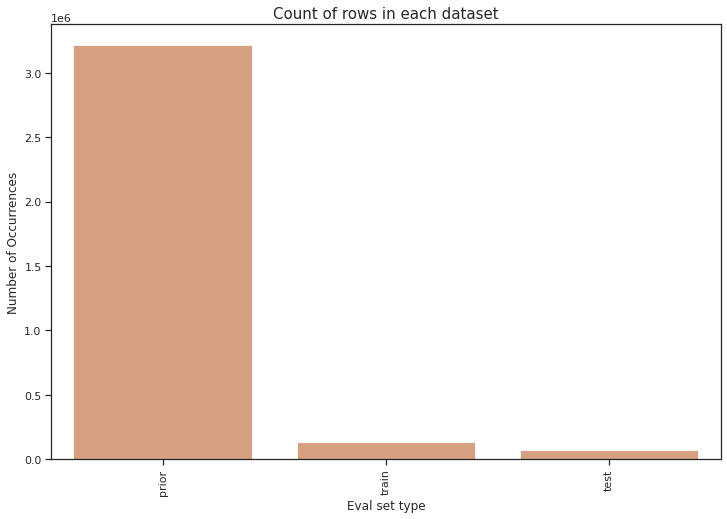

In [24]:

def make_barchart(data_input, y_label, x_label, title):
  cnt_srs = data_input.eval_set.value_counts()
  plt.figure(figsize=(12,8))
  sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
  plt.ylabel(y_label, fontsize=12)
  plt.xlabel(x_label, fontsize=12)
  plt.title(title, fontsize=15)
  plt.xticks(rotation='vertical')
  plt.show()

make_barchart(orders,'Number of Occurrences', 'Eval set type', 'Count of rows in each dataset')

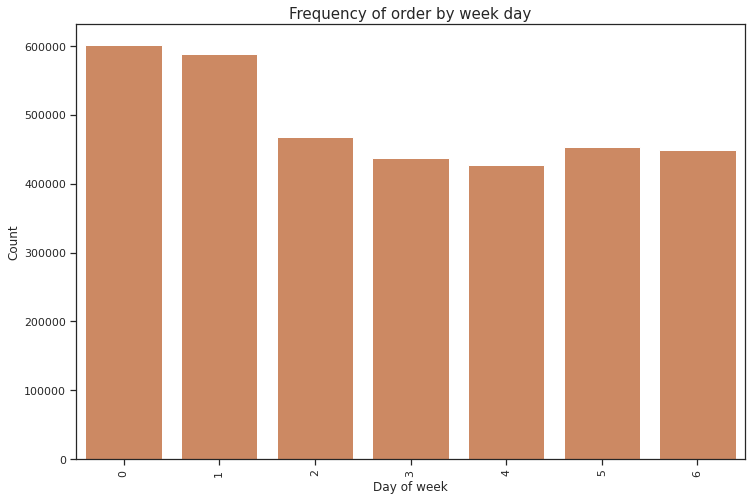

In [31]:

def count_plot(X, data, ylabel, xlabel, title, color_num):
  plt.figure(figsize=(12,8))
  sns.countplot(x=X, data=data, color=color[color_num])
  plt.ylabel(ylabel, fontsize=12)
  plt.xlabel(xlabel, fontsize=12)
  plt.xticks(rotation='vertical')
  plt.title(title, fontsize=15)
  plt.show()

count_plot("order_dow", orders, "Count", "Day of week", "Frequency of order by week day", 1)

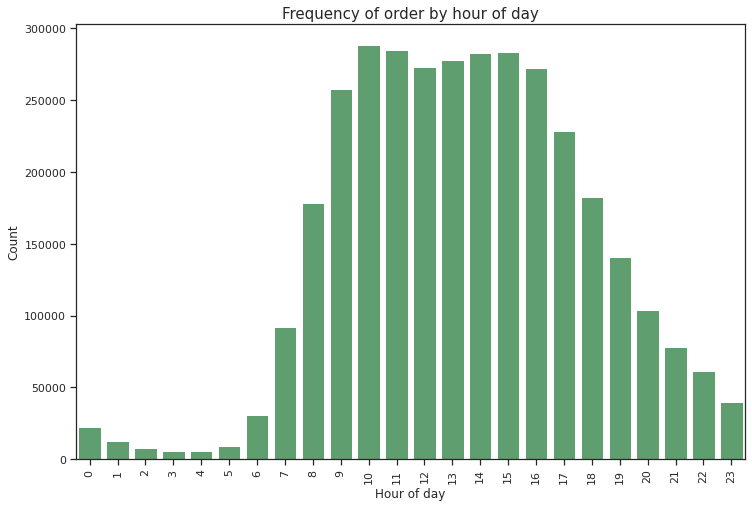

In [32]:
count_plot("order_hour_of_day", orders, "Count", "Hour of day", "Frequency of order by hour of day", 2)